In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

# Load results

## synth results

In [2]:
path_to_data = '../recipes/echo_aware_processing/results_synth.csv'
results_synt = pd.read_csv(path_to_data)
results_synt

,Unnamed: 0,array,dataset,target_idx,interf_idx,sir,snr,bf,sar_out,sir_in,snr_in,sir_out,snr_out,pesq_in,pesq_out
0,0,0.0,0.0,0.0,2.0,0.0,0.0,dpDS,-6.091475,1.928655e-15,0.016051,-0.059176,4.672636,1.614886,1.816833
1,1,0.0,0.0,0.0,2.0,0.0,0.0,rtfMVDR,11.971988,1.928655e-15,0.016051,11.432435,6.621030,1.614886,1.958202
2,2,0.0,0.0,0.0,2.0,0.0,0.0,ecoMVDR,6.053983,1.928655e-15,0.016051,10.510525,9.300582,1.614886,2.085810
3,3,0.0,0.0,0.0,2.0,0.0,0.0,rtfLCMV,7.977399,1.928655e-15,0.016051,8.632972,7.999073,1.614886,1.959983
4,4,0.0,0.0,0.0,2.0,0.0,0.0,ecoLCMV,5.963674,1.928655e-15,0.016051,29.405838,8.793940,1.614886,2.181317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,3370,4.0,4.0,3.0,2.0,20.0,20.0,dpDS,-8.752221,2.000000e+01,20.001639,23.345647,25.529789,2.924342,3.117394
3371,3371,4.0,4.0,3.0,2.0,20.0,20.0,rtfMVDR,7.795761,2.000000e+01,20.001639,31.243073,27.946180,2.924342,3.134702
3372,3372,4.0,4.0,3.0,2.0,20.0,20.0,ecoMVDR,6.323572,2.000000e+01,20.001639,30.210212,28.932487,2.924342,3.132622
3373,3373,4.0,4.0,3.0,2.0,20.0,20.0,rtfLCMV,6.793813,2.000000e+01,20.001639,30.976593,27.812204,2.924342,3.163656


## real results

In [3]:
path_to_data = '../recipes/echo_aware_processing/results.csv'
results_real = pd.read_csv(path_to_data)
results_real

,Unnamed: 0,array,dataset,target_idx,interf_idx,sir,snr,bf,sar_out,sir_in,snr_in,sir_out,snr_out,pesq_in,pesq_out
0,0,0.0,0.0,0.0,2.0,0.0,0.0,dpDS,-0.916326,-4.821637e-16,0.000264,0.561599,0.719897,1.824027,1.845208
1,1,0.0,0.0,0.0,2.0,0.0,0.0,rtfMVDR,5.356081,-4.821637e-16,0.000264,-0.380427,15.269116,1.824027,2.202321
2,2,0.0,0.0,0.0,2.0,0.0,0.0,ecoMVDR,-7.466213,-4.821637e-16,0.000264,-3.066512,22.601052,1.824027,2.109905
3,3,0.0,0.0,0.0,2.0,0.0,0.0,rtfLCMV,6.466536,-4.821637e-16,0.000264,5.210389,9.906325,1.824027,2.083087
4,4,0.0,0.0,0.0,2.0,0.0,0.0,ecoLCMV,-7.718733,-4.821637e-16,0.000264,-1.839653,21.471164,1.824027,2.043554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,3370,4.0,4.0,3.0,2.0,20.0,20.0,dpDS,-1.636160,2.000000e+01,19.972526,21.200702,18.896353,3.373317,2.870802
3371,3371,4.0,4.0,3.0,2.0,20.0,20.0,rtfMVDR,7.038391,2.000000e+01,19.972526,20.677240,32.976674,3.373317,3.171136
3372,3372,4.0,4.0,3.0,2.0,20.0,20.0,ecoMVDR,-10.667771,2.000000e+01,19.972526,18.794028,47.238518,3.373317,2.951145
3373,3373,4.0,4.0,3.0,2.0,20.0,20.0,rtfLCMV,7.108186,2.000000e+01,19.972526,24.739132,30.747556,3.373317,3.039673


In [35]:
results_real['data'] = 'real'
results_synt['data'] = 'synt'
results = pd.concat([results_synt, results_real], ignore_index=True)
print(results)

      Unnamed: 0  array  dataset  target_idx  interf_idx   sir   snr       bf  \
0              0    0.0      0.0         0.0         2.0   0.0   0.0     dpDS   
1              1    0.0      0.0         0.0         2.0   0.0   0.0  rtfMVDR   
2              2    0.0      0.0         0.0         2.0   0.0   0.0  ecoMVDR   
3              3    0.0      0.0         0.0         2.0   0.0   0.0  rtfLCMV   
4              4    0.0      0.0         0.0         2.0   0.0   0.0  ecoLCMV   
...          ...    ...      ...         ...         ...   ...   ...      ...   
6745        3370    4.0      4.0         3.0         2.0  20.0  20.0     dpDS   
6746        3371    4.0      4.0         3.0         2.0  20.0  20.0  rtfMVDR   
6747        3372    4.0      4.0         3.0         2.0  20.0  20.0  ecoMVDR   
6748        3373    4.0      4.0         3.0         2.0  20.0  20.0  rtfLCMV   
6749        3374    4.0      4.0         3.0         2.0  20.0  20.0  ecoLCMV   

        sar_out        sir_

# Investigation

## Global metrics vs bf

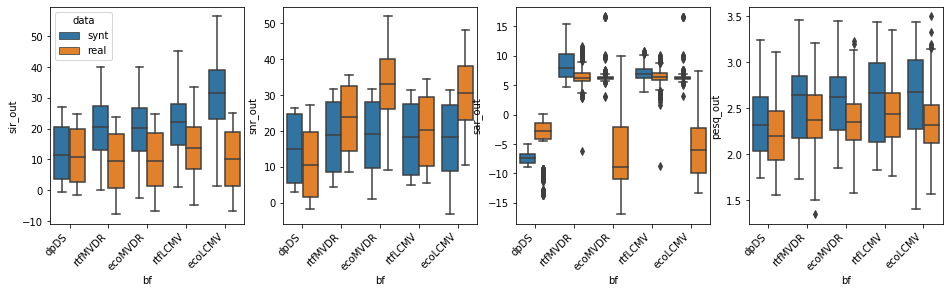

In [36]:
loc_res = results.copy()
# plot
plt.figure(figsize=(16,4))
plt.subplot(141)
g = sns.boxplot(x='bf', y="sir_out", hue='data', data=loc_res)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(142)
g = sns.boxplot(x='bf', y="snr_out", hue='data', data=loc_res)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.legend_.remove()

plt.subplot(143)
g = sns.boxplot(x='bf', y="sar_out", hue='data', data=loc_res)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.legend_.remove()

plt.subplot(144)
g = sns.boxplot(x='bf', y="pesq_out", hue='data', data=loc_res)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.legend_.remove()
plt.show()

## Incemental metrics vs bf

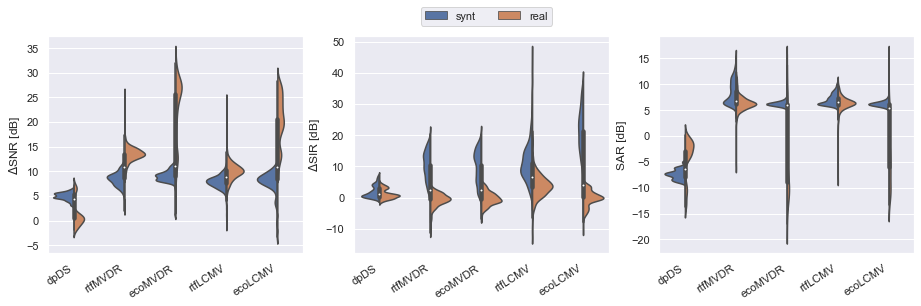

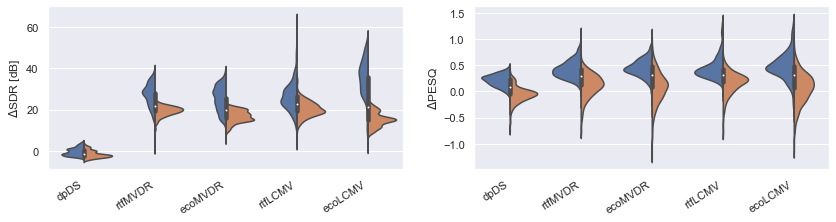

In [125]:
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
loc_res['sdr_inc'] = loc_res['sir_inc'] + loc_res['snr_inc'] + loc_res['sar_out']
# plot
plt.figure(figsize=(21,4))
plt.subplot(141)
g1 = sns.violinplot(x='bf', y="snr_inc", hue='data', data=loc_res, split=True)
g1.set_xticklabels(g1.get_xticklabels(), rotation=33, horizontalalignment='right')
g1.legend_.remove()
g1.set(ylabel=r'$\Delta$SNR [dB]', xlabel='')

plt.subplot(142)
g2 = sns.violinplot(x='bf', y="sir_inc", hue='data', data=loc_res, split=True)
g2.set_xticklabels(g2.get_xticklabels(), rotation=33, horizontalalignment='right')
g2.legend_.remove()
g2.legend(bbox_to_anchor=(0.3, 0.66, 0.5, 0.5), loc=1, ncol=2)
g2.set(ylabel=r'$\Delta$SIR [dB]', xlabel='')

plt.subplot(143)
g4 = sns.violinplot(x='bf', y="sar_out", hue='data', data=loc_res, split=True)
g4.set_xticklabels(g4.get_xticklabels(), rotation=33, horizontalalignment='right')
g4.legend_.remove()
g4.set(ylabel=r'SAR [dB]', xlabel='')

plt.savefig('../recipes/echo_aware_processing/bsseval_results_box.pdf', dpi=300)
plt.show()


plt.figure(figsize=(14,3))
plt.subplot(121)
g4 = sns.violinplot(x='bf', y="sdr_inc", hue='data', data=loc_res, split=True)
g4.set_xticklabels(g4.get_xticklabels(), rotation=33, horizontalalignment='right')
g4.legend_.remove()
g4.set(ylabel=r'$\Delta$SDR [dB]', xlabel='')

plt.subplot(122)
g3 = sns.violinplot(x='bf', y="pesq_inc", hue='data', data=loc_res, split=True)
g3.set_xticklabels(g.get_xticklabels(), rotation=33, horizontalalignment='right')
g3.legend_.remove()
g3.set(ylabel=r'$\Delta$PESQ', xlabel='')
plt.savefig('../recipes/echo_aware_processing/pesq_results_violin.pdf', dpi=300)
plt.show()

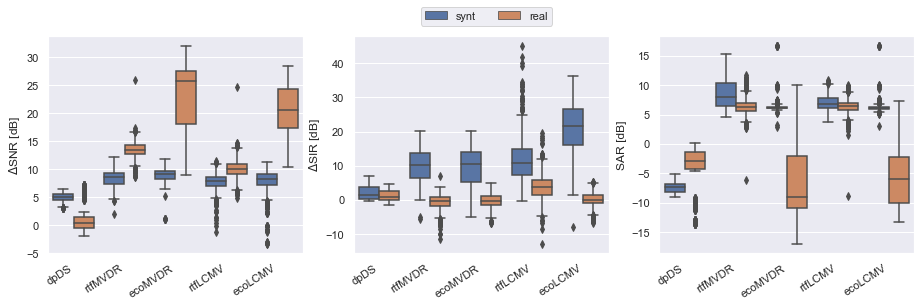

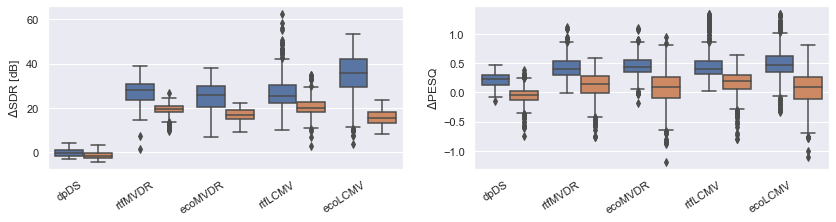

In [127]:
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
loc_res['sdr_inc'] = loc_res['sir_inc'] + loc_res['snr_inc'] + loc_res['sar_out']
# plot
plt.figure(figsize=(21,4))
plt.subplot(141)
g1 = sns.boxplot(x='bf', y="snr_inc", hue='data', data=loc_res,)
g1.set_xticklabels(g1.get_xticklabels(), rotation=33, horizontalalignment='right')
g1.legend_.remove()
g1.set(ylabel=r'$\Delta$SNR [dB]', xlabel='')

plt.subplot(142)
g2 = sns.boxplot(x='bf', y="sir_inc", hue='data', data=loc_res,)
g2.set_xticklabels(g2.get_xticklabels(), rotation=33, horizontalalignment='right')
g2.legend_.remove()
g2.legend(bbox_to_anchor=(0.3, 0.66, 0.5, 0.5), loc=1, ncol=2)
g2.set(ylabel=r'$\Delta$SIR [dB]', xlabel='')

plt.subplot(143)
g4 = sns.boxplot(x='bf', y="sar_out", hue='data', data=loc_res,)
g4.set_xticklabels(g4.get_xticklabels(), rotation=33, horizontalalignment='right')
g4.legend_.remove()
g4.set(ylabel=r'SAR [dB]', xlabel='')

plt.savefig('../recipes/echo_aware_processing/bsseval_results_boxplot.pdf', dpi=300)
plt.show()


plt.figure(figsize=(14,3))
plt.subplot(121)
g4 = sns.boxplot(x='bf', y="sdr_inc", hue='data', data=loc_res,)
g4.set_xticklabels(g4.get_xticklabels(), rotation=33, horizontalalignment='right')
g4.legend_.remove()
g4.set(ylabel=r'$\Delta$SDR [dB]', xlabel='')

plt.subplot(122)
g3 = sns.boxplot(x='bf', y="pesq_inc", hue='data', data=loc_res)
g3.set_xticklabels(g.get_xticklabels(), rotation=33, horizontalalignment='right')
g3.legend_.remove()
g3.set(ylabel=r'$\Delta$PESQ', xlabel='')
plt.savefig('../recipes/echo_aware_processing/pesq_results_boxplot.pdf', dpi=300)
plt.show()

# Performance vs Dataset (~ RT60)

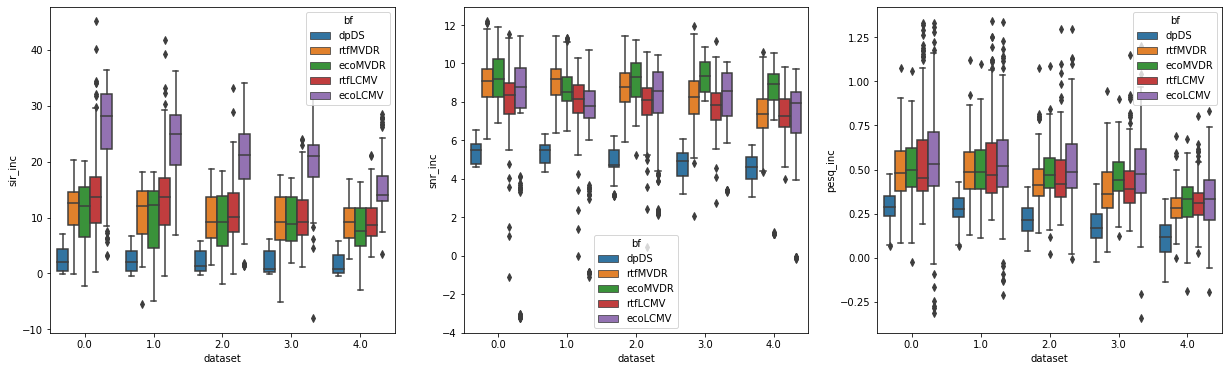

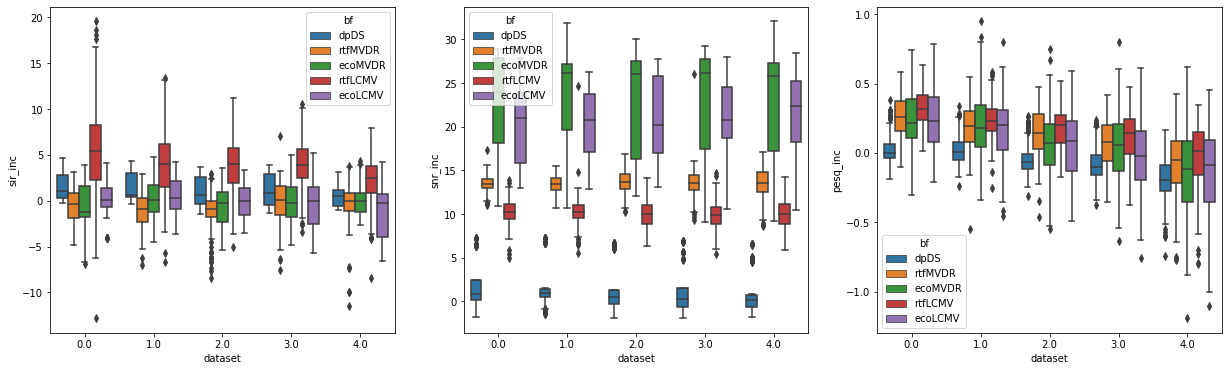

In [6]:
# filter
loc_res_synt = results_synt.copy()
loc_res_real = results_real.copy()
loc_ress = [loc_res_synt, loc_res_real]
# plot
for loc_res in loc_ress:

    loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
    loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
    loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
    # plot
    varx = 'dataset'
    varh = 'bf'
    plt.figure(figsize=(21,6))
    plt.subplot(131)
    sns.boxplot(x=varx, y="sir_inc", hue=varh,
                data=loc_res)
    plt.subplot(132)
    sns.boxplot(x=varx, y="snr_inc", hue=varh,
                data=loc_res)
    plt.subplot(133)
    sns.boxplot(x=varx, y="pesq_inc", hue=varh,
                data=loc_res)
    plt.show()

# Performance vs Geomtery (~ DDR)

In [7]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
grid = sns.axisgrid.FacetGrid(loc_res, row='array', col='target_idx', sharey=True)
grid.map(sns.boxplot, 'bf', 'sir_inc')

NameError: name 'results' is not defined

In [ ]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
grid = sns.axisgrid.FacetGrid(loc_res, row='array', col='target_idx', sharey=True)
grid.map(sns.boxplot, 'bf', 'snr_inc')

In [ ]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
varx = 'array'
varh = 'bf'
plt.figure(figsize=(21,6))
plt.subplot(131)
sns.boxplot(x=varx, y="sir_inc", hue=varh,
            data=loc_res)
plt.subplot(132)
sns.boxplot(x=varx, y="snr_inc", hue=varh,
            data=loc_res)
plt.subplot(133)
sns.boxplot(x=varx, y="pesq_inc", hue=varh,
            data=loc_res)
plt.show()

In [8]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
varx = 'target_idx'
varh = 'bf'
plt.figure(figsize=(21,6))
plt.subplot(131)
sns.boxplot(x=varx, y="sir_inc", hue=varh,
            data=loc_res)
plt.subplot(132)
sns.boxplot(x=varx, y="snr_inc", hue=varh,
            data=loc_res)
plt.subplot(133)
sns.boxplot(x=varx, y="pesq_inc", hue=varh,
            data=loc_res)
plt.show()

NameError: name 'results' is not defined

In [ ]:
res